In [1]:
# Part A: Classification

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load and preprocess data
def load_preprocess():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    
    scaler = MinMaxScaler()
    df[iris.feature_names] = scaler.fit_transform(df[iris.feature_names])
    
    X = df.drop(columns=['species'])
    y = df['species']
    
    return train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train and evaluate Decision Tree
def decision_tree_classifier(X_train, X_test, y_train, y_test):
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    
    print("Decision Tree Classifier Metrics:")
    print_metrics(y_test, y_pred)
    
    # Visualize the tree
    plt.figure(figsize=(12,8))
    plot_tree(dt, feature_names=X_train.columns, class_names=[str(i) for i in dt.classes_], filled=True)
    plt.title("Decision Tree Visualization")
    plt.savefig("decision_tree.png")
    plt.show()
    
    return dt, y_pred

# Train and evaluate KNN
def knn_classifier(X_train, X_test, y_train, y_test, k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    print(f"KNN Classifier (k={k}) Metrics:")
    print_metrics(y_test, y_pred)
    return knn, y_pred

# Helper function to print metrics
def print_metrics(y_true, y_pred):
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-score:  {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print("-"*40)

# Main classification workflow
def classification_task():
    X_train, X_test, y_train, y_test = load_preprocess()
    
    dt_model, dt_pred = decision_tree_classifier(X_train, X_test, y_train, y_test)
    knn_model, knn_pred = knn_classifier(X_train, X_test, y_train, y_test)
    
    # Compare which is better by accuracy
    dt_acc = accuracy_score(y_test, dt_pred)
    knn_acc = accuracy_score(y_test, knn_pred)
    
    print("Comparison:")
    if dt_acc > knn_acc:
        print("Decision Tree performs better.")
    elif knn_acc > dt_acc:
        print("KNN performs better.")
    else:
        print("Both classifiers perform equally well.")


In [3]:
# Part B: Association Rule Mining

import random
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Generate synthetic transactional data
def generate_transactions(num_transactions=40):
    items_pool = ['milk', 'bread', 'beer', 'diapers', 'eggs', 'cheese', 'cola', 'chips',
                  'butter', 'yogurt', 'cereal', 'coffee', 'tea', 'juice', 'apple', 'banana',
                  'chicken', 'beef', 'fish', 'rice']
    transactions = []
    for _ in range(num_transactions):
        # Each basket has 3-8 items, with some frequent co-occurrence patterns
        basket_size = random.randint(3,8)
        basket = random.choices(items_pool, k=basket_size)
        # Add frequent co-occurrences (e.g. bread & butter, beer & diapers)
        if random.random() < 0.4:
            basket += ['bread', 'butter']
        if random.random() < 0.3:
            basket += ['beer', 'diapers']
        # Remove duplicates
        basket = list(set(basket))
        transactions.append(basket)
    return transactions

# Convert transactions to one-hot encoded DataFrame
def encode_transactions(transactions):
    all_items = sorted({item for basket in transactions for item in basket})
    encoded_vals = []
    for basket in transactions:
        row = {item: (item in basket) for item in all_items}
        encoded_vals.append(row)
    return pd.DataFrame(encoded_vals)

# Apply Apriori and find rules
def apriori_rules(df_encoded):
    frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    rules_sorted = rules.sort_values(by='lift', ascending=False)
    
    print("Top 5 association rules sorted by lift:")
    print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))
    
    return rules_sorted

# Analyze one rule (you can adapt this part in your report)
def analyze_rule(rules_sorted):
    if rules_sorted.empty:
        print("No rules generated.")
        return
    rule = rules_sorted.iloc[0]
    antecedents = ', '.join(list(rule['antecedents']))
    consequents = ', '.join(list(rule['consequents']))
    print(f"\nRule analysis:\nIf a customer buys [{antecedents}], "
          f"they are likely to also buy [{consequents}].\n"
          "This insight can help retailers with targeted product placement, "
          "cross-selling strategies, and promotions to increase sales.")

# Main association mining workflow
def association_rule_mining_task():
    transactions = generate_transactions()
    print(f"Generated {len(transactions)} transactions.")
    
    df_encoded = encode_transactions(transactions)
    
    rules_sorted = apriori_rules(df_encoded)
    
    analyze_rule(rules_sorted)


=== Classification Task ===
Decision Tree Classifier Metrics:
Accuracy:  0.9333
Precision: 0.9333
Recall:    0.9333
F1-score:  0.9333
----------------------------------------


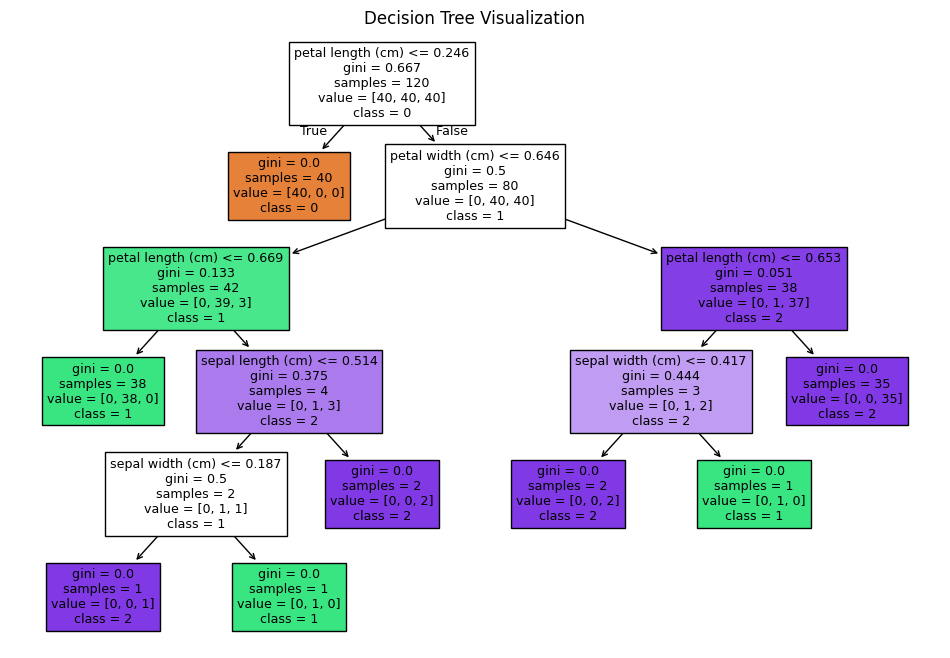

KNN Classifier (k=5) Metrics:
Accuracy:  0.9667
Precision: 0.9697
Recall:    0.9667
F1-score:  0.9666
----------------------------------------
Comparison:
KNN performs better.

=== Association Rule Mining Task ===
Generated 40 transactions.
Top 5 association rules sorted by lift:
          antecedents        consequents  support  confidence      lift
33   (diapers, bread)     (butter, beer)     0.20    0.666667  2.424242
32     (butter, beer)   (diapers, bread)     0.20    0.727273  2.424242
34      (beer, bread)  (butter, diapers)     0.20    0.727273  2.237762
31  (butter, diapers)      (beer, bread)     0.20    0.615385  2.237762
14     (butter, beer)            (bread)     0.25    0.909091  1.731602

Rule analysis:
If a customer buys [diapers, bread], they are likely to also buy [butter, beer].
This insight can help retailers with targeted product placement, cross-selling strategies, and promotions to increase sales.


In [4]:
def main():
    print("=== Classification Task ===")
    classification_task()
    
    print("\n=== Association Rule Mining Task ===")
    association_rule_mining_task()

if __name__ == "__main__":
    main()
